In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [11]:
def read_nnbar(m, s, n1, n2, inv_cov=None, select='sub'):
    dof = inv_cov.shape[0]

    d = np.load(f'/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_{m}_{s}_{n1}_v7_2_main_{n2}.npy', allow_pickle=True)
    nnbar = []
    #nnbar_err = []

    for i, di in enumerate(d):
        
        if select == 'sub':            
            if i not in [0, 1, 5, 7, 13]:
                continue
                
        nnbar.append(di['nnbar']-1)
        #nnbar_err.append(di['nnbar_err'])

    nnbar = np.array(nnbar).flatten()
    #nnbar_err  = np.array(nnbar_err).flatten()
    
    chi2 = np.matmul(nnbar, np.matmul(inv_cov, nnbar)).sum() # i.e., (N/Nbar - 1)^T Cov^-1 (N/Nbar - 1)
    
    print(f'{m:12s}, {s:12s}, {chi2:.1f}, {chi2/dof:.3f}') # {n1:3s}, {n2:3s},
    

def get_inv_cov(n, select='sub'):
    nnbar_null = glob(f'/home/mehdi/data/eboss/mocks/1.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_0_*_main_{n}.npy')
    nmocks = len(nnbar_null)
    print(f'nmocks: {nmocks}')
    
    err_j_a = []
    err_p_a = []

    for j, fn in enumerate(nnbar_null):
        d = np.load(fn, allow_pickle=True)


        err_j = []
        err_p = []

        for i, di in enumerate(d):
            
            if select == 'sub':
                if i not in [0, 1, 5, 7, 13]:
                    continue

            sf = di['attr']['nbar']
            n_r = di['area']/di['attr']['npix2area']
            n_g = di['nnbar']*sf*n_r

            err_j_ = di['nnbar'] - 1.0
            err_p_ =  (n_g+n_g/n_r)/(sf*n_r)**2

            err_p.append(err_p_)
            err_j.append(err_j_)

        err_j_a.append(err_j)
        err_p_a.append(err_p)

        print('.', end='')

    # err_p_m = np.cov(np.array(err_p_a).reshape(1000, -1), axis=0)
    
    err_j_m = np.cov(np.array(err_j_a).reshape(nmocks, -1), rowvar=False)# / 1000.
    nbins = err_j_m.shape[0]
    print(f'nbins: {nbins}')
    
    hartlop_factor = (nmocks - 1.) / (nmocks - nbins - 2.)
    err_j_m *= hartlop_factor
    
    inv_cov = np.linalg.inv(err_j_m)
    plt.imshow(err_j_m, origin='lower', cmap=plt.cm.bwr, vmin=-1.0e-5, vmax=1.0e-5)
    plt.colorbar()
    
#     plt.imshow(inv_cov, origin='lower', cmap=plt.cm.bwr, vmin=-1.0e+12, vmax=1.0e+12)
#     plt.colorbar()
    return inv_cov

nmocks: 1000
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

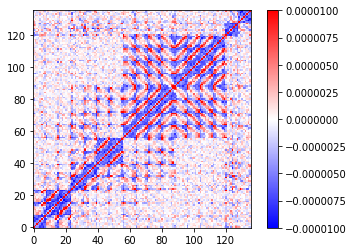

In [3]:
inv_cov_512 = get_inv_cov('512', select='all')

nmocks: 1000
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

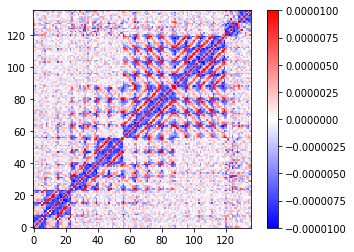

In [4]:
inv_cov_256 = get_inv_cov('256', select='all')

In [14]:
print(20*'-', '512 / 512', 20*'-')
read_nnbar('noweight', 'mainhighz', '512', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('knownsystot', 'mainhighz', '512', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('known', 'mainhighz', '512', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('all', 'mainhighz', '512', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('known', 'lowmidhighz', '512', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('all', 'lowmidhighz', '512', '512', inv_cov=inv_cov_512, select='all')
print(20*'-', '256 / 512', 20*'-')
read_nnbar('known', 'mainhighz', '256', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('all', 'mainhighz', '256', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('known', 'lowmidhighz', '256', '512', inv_cov=inv_cov_512, select='all')
read_nnbar('all', 'lowmidhighz', '256', '512', inv_cov=inv_cov_512, select='all')
print(40*'=')
print(20*'-', '512 / 256', 20*'-')
read_nnbar('noweight', 'mainhighz', '512', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('knownsystot', 'mainhighz', '512', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('known', 'mainhighz', '512', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('all', 'mainhighz', '512', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('known', 'lowmidhighz', '512', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('all', 'lowmidhighz', '512', '256', inv_cov=inv_cov_256, select='all')
print(20*'-', '256 / 256', 20*'-')
read_nnbar('known', 'mainhighz', '256', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('all', 'mainhighz', '256', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('known', 'lowmidhighz', '256', '256', inv_cov=inv_cov_256, select='all')
read_nnbar('all', 'lowmidhighz', '256', '256', inv_cov=inv_cov_256, select='all')

-------------------- 512 / 512 --------------------
noweight    , mainhighz   , 1369.2, 10.067
knownsystot , mainhighz   , 240.5, 1.768
known       , mainhighz   , 186.3, 1.370
all         , mainhighz   , 177.2, 1.303
known       , lowmidhighz , 193.2, 1.420
all         , lowmidhighz , 180.4, 1.326
-------------------- 256 / 512 --------------------
known       , mainhighz   , 202.0, 1.485
all         , mainhighz   , 229.5, 1.688
known       , lowmidhighz , 233.1, 1.714
all         , lowmidhighz , 242.6, 1.784
-------------------- 512 / 256 --------------------
noweight    , mainhighz   , 927.7, 6.821
knownsystot , mainhighz   , 227.4, 1.672
known       , mainhighz   , 210.3, 1.546
all         , mainhighz   , 199.1, 1.464
known       , lowmidhighz , 272.4, 2.003
all         , lowmidhighz , 251.3, 1.848
-------------------- 256 / 256 --------------------
known       , mainhighz   , 222.4, 1.635
all         , mainhighz   , 160.7, 1.182
known       , lowmidhighz , 225.8, 1.660
all        

In [8]:
path = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/'
nnbar = lambda m, s, n1, n2:np.load(f'{path}nnbar_NGC_{m}_{s}_{n1}_v7_2_main_{n2}.npy', allow_pickle=True)

In [9]:
nnbars = {}
nnbars['512in512'] = nnbar('known', 'mainhighz', '512', '512')
nnbars['512in256'] = nnbar('known', 'mainhighz', '512', '256')

36.51456044371006 star_density
42.77367871726689 star_density
3.391889725434309 ebv
6.106662128597638 ebv
11.697395458585813 sky_i
5.274915677268986 sky_i
3.6581367033110954 depth_g_minus_ebv
7.022536969225374 depth_g_minus_ebv
3.200372777325092 psf_i
4.439867272550025 psf_i


Text(0, 0.5, '1 + $\\delta$')

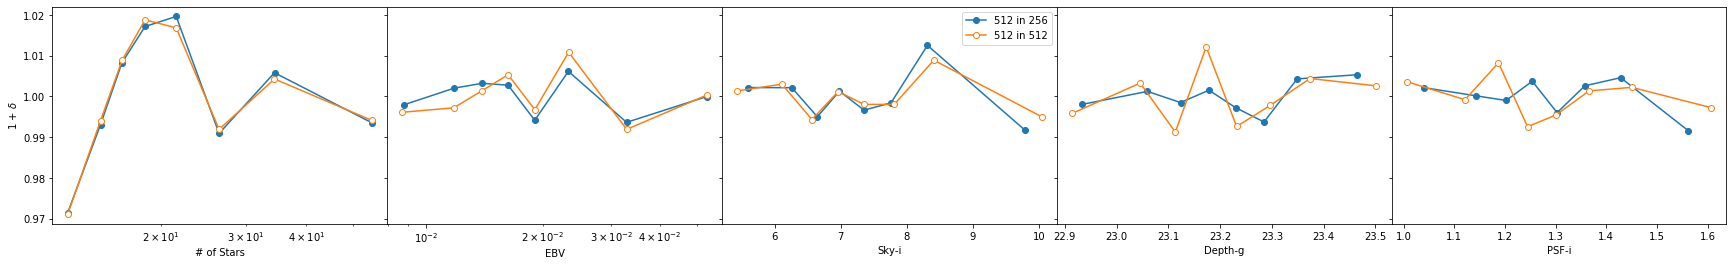

In [10]:
def add_plot(ax, nbar, divide_by_4, **kw):
    bavg = nbar['bin_avg'] * 1.0
    
    if divide_by_4:
        bavg /= 4.
        
    ax.plot(bavg, nbar['nnbar'], **kw)
    #ax.plot(0.5*(nbar['bin_edges'][1:]+nbar['bin_edges'][:-1]), nbar['nnbar'], **kw)
    chi2v  = (((nbar['nnbar']-1)/nbar['nnbar_err'])**2).sum()
    print(chi2v, nbar['sys'])
    
fig, ax = plt.subplots(ncols=5, figsize=(30, 4), sharey=True)
fig.subplots_adjust(wspace=0)

lb = ['# of Stars', 'EBV', 'Sky-i', 'Depth-g', 'PSF-i']

for i, ix in enumerate([0, 1, 5, 7, 13]):
    divide = True if ix==0 else False
    add_plot(ax[i], nnbars['512in256'][ix], divide, marker='o', label='512 in 256')
    add_plot(ax[i], nnbars['512in512'][ix], False, marker='o', mfc='w', label='512 in 512')
    
    ax[i].set(xlabel=lb[i])
    if i < 2:
        ax[i].set_xscale('log')
ax[2].legend()
ax[0].set_ylabel(r'1 + $\delta$')

## Test nbar

In [1]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.utils import EbossCat
from lssutils.stats.nnbar import MeanDensity

In [2]:
import pandas as pd
import numpy as np

In [3]:
dat_fn = '/home/mehdi/data/eboss/data/v7_2/1.0/catalogs/eBOSS_QSO_full_NGC_all_mainhighz_256_v7_2.ran.fits'
dat256 = EbossCat(dat_fn, kind='randoms', zmin=0.8, zmax=2.2)
dat512 = EbossCat(dat_fn.replace('256', '512'), kind='randoms', zmin=0.8, zmax=2.2)

column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file


In [5]:
dat_fn = '/home/mehdi/data/eboss/data/v7_2/eBOSS_QSO_full_NGC_v7_2.ran.fits'
dat512_ = EbossCat(dat_fn, kind='randoms', zmin=0.8, zmax=2.2)

column QSO_ID not in the randoms file
column IMATCH not in the randoms file


In [6]:
np.var(dat256['WEIGHT_SYSTOT']), np.var(dat512['WEIGHT_SYSTOT']), np.var(dat512_['WEIGHT_SYSTOT'])

(0.005817713228741466, 0.005459346811390732, 0.00313043323865972)

In [4]:
df = pd.read_hdf('/home/mehdi/data/templates/SDSS_WISE_HI_imageprop_nside512.h5', 'templates')

In [5]:
depth_g = df['depth_g_minus_ebv'].values

In [13]:
# case 1
hpdat = dat.to_hp(512, 0.8, 2.2, raw=2)
hpran = ran.to_hp(512, 0.8, 2.2, raw=2)

# case 2
hpran_ = ran.to_hp(512, 0.8, 2.2, raw=1)

/home/mehdi/miniconda3/envs/sysnet/lib/python3.8/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


In [24]:
mask = (hpran > 0) & (hpran_ > 0) & (np.isfinite(depth_g))

In [58]:
np.percentile(depth_g[mask], [2, 98])

array([22.83525231, 23.56066845])

In [59]:
bins = np.linspace(22.8, 23.4, 11)
nbar_1 = MeanDensity(hpdat, hpran, mask, depth_g, nbins=10, bins=bins, binning='simple')
nbar_2 = MeanDensity(hpdat, hpran_, mask, depth_g, nbins=10, bins=bins, binning='simple')

In [60]:
nbar_1.run()
nbar_2.run()

(0.9, 1.1)

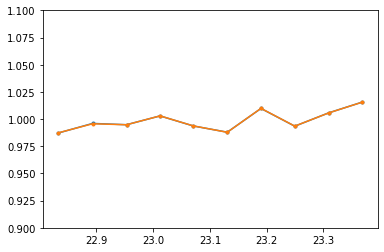

In [62]:
for nbar_i in [nbar_1.output, nbar_2.output]:
    plt.plot(nbar_i['bin_avg'], nbar_i['nnbar'], marker='.')
    
plt.ylim(0.9, 1.1)

In [63]:
dat

catalog : data
# of objects : 218209
z : (0.8000152398143878, 2.199999421096105)
columns : ['RA', 'DEC', 'Z', 'WEIGHT_FKP', 'WEIGHT_SYSTOT', 'WEIGHT_CP', 'WEIGHT_NOZ', 'NZ', 'QSO_ID', 'IMATCH', 'COMP_BOSS', 'sector_SSR']

In [65]:
np.std(dat['WEIGHT_SYSTOT'])

0.052871011877197734